In [567]:
## Dingyi Kang
## A20308046
## Assignment2 - problem 2

import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [568]:
# get input and output training data and convert them to arrays of floats
X = np.loadtxt("/content/drive/My Drive/X_train.csv")
#print(X.shape)
#print(X.dtype)

Y = np.loadtxt("/content/drive/My Drive/Y_train.csv")
#print(Y.shape)
#print(Y.dtype)

In [569]:
# Define sigmoid activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))
 
# Define derivative of sigmoid function
def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))

# Define the function to calculate the mean squre error
def mse_loss(yPred, yTrue):
  return np.square(np.subtract(yPred, yTrue)).mean()

# The function to train neural network  using backprop 
def backpropTraining(epoch, numNeuron, learningRate, x, y):
  
  # Define initial parameters
  # if the hidden layer has three neurons, we will have 3 rows of W1 and b1
  # given there are two input features, W1 has 2 columns
  # b1 and b2 are bias and thus always have only one column
  W1 = np.random.rand(numNeuron,2)
  b1 = np.random.rand(numNeuron,1)
  # the output layer has only one neuron and thus we have 1 row of W2 and b2
  # if there are three inputs (neurons) from previous layers, W2 will have three columns
  W2 = np.random.rand(1,numNeuron)
  b2 = np.random.rand(1,1)

  numData = x.shape[0]

  #print("Number of data", numData)
  #print("---------------------")
  #print("Initial parameters:")
  #print("W1", W1)
  #print("b1", b1)
  #print("---------------------")
  #print("W2", W2)
  #print("b2", b2)


  mse_list = []
  for i in range(epoch):
      # forward pass
      z1 = np.dot(W1, x.T) + b1
      # the activation function of hidden layer is sigmoid
      a1 = sigmoid(z1)
      #print(a1)
      z2 = np.dot(W2, a1) + b2
      # the activation function of output layer is identity function
      a2 = z2
      #print(a2)
      # Initial output
      #print("Prediction:", a2, "Actual:", y)

      # calucate the loss
      mse = mse_loss(a2, Y)
      mse_list.append(mse)
      # Backward update
      # Compute gradients
      diff2 = (a2 - y)
      dW2 = np.dot(diff2, a1.T) * (2/numData)
      #print(W2)
      #print(dW2)
      #print(diff2)
      db2 = diff2.sum(axis=1) * (2/numData)
      db2 = db2.reshape(b2.shape)
      #print(b2)
      #print(db2)

      diff1 = np.dot(W2.T, diff2) * sigmoid(z1) * (1-sigmoid(z1))
      #print(diff1)
      dW1 = np.dot(diff1, x) * (2/numData)
      #print(W1)
      #print(dW1)

      db1 = diff1.sum(axis=1) * (2/numData)
      db1 = db1.reshape(b1.shape)
      #print(b1)
      #print(db1)

      # Update weights
      W2 = W2 - learningRate * dW2
      b2 = b2 - learningRate * db2
      W1 = W1 - learningRate * dW1
      b1 = b1 - learningRate * db1
  return (W1, W2, b1, b2, mse_list)

Answer to question 1: the activation function we choose for output layer is identity function, namely g(z) = z. 
The reason is we are constructing a neural network for the regression task, which outputs don't need to be transformed. 

Answer to question 2: only one neuron should be in the output layer. Reason: this is a neural network for the regression task and thus the output should be a single numeric prediction value, and thus one and only one neuron is needed.

In [570]:

# we initiate the hidden layer with three neurons at the first attemp
# and with leaning rate of 0.01 and epoch of 2000 at the first attempt
epoch=2000
numNeuron=3
learningRate = 0.01

# begin to train data
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)

# get the final predictin values of the training data
z1 = np.dot(W1, X.T) + b1
a1 = sigmoid(z1)
z2 = np.dot(W2, a1) + b2
a2 = z2

mse = mse_loss(a2, Y)

print("With %d neurons in the hidden layer, learning rate of %.4f, and %d epoches, we have:" % (numNeuron, learningRate, epoch))

print("the final average MSE loss on training dataset is: ", mse)

Xtest = np.loadtxt("/content/drive/My Drive/X_test.csv")
#print(Xtest.shape)
#print(Xtest.dtype)

Ytest = np.loadtxt("/content/drive/My Drive/Y_test.csv")
#print(Xtest.shape)
#print(Xtest.dtype)

z01 = np.dot(W1, Xtest.T) + b1
a01 = sigmoid(z01)
z02 = np.dot(W2, a01) + b2
a02 = z02

mse2 = mse_loss(a02, Ytest)
print("the average MSE loss on testing dataset is: ", mse2)

With 3 neurons in the hidden layer, learning rate of 0.0100, and 2000 epoches, we have:
the final average MSE loss on training dataset is:  81.25793444774317
the average MSE loss on testing dataset is:  215.85367962208798


Answer to question 3: 
as shown above, the final average MSE loss on training dataset is around:  79.8

The average MSE loss on testing dataset is: 209.5

The relationship between MSE loss and the number of iterations is as below:


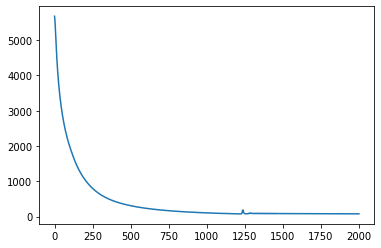

In [571]:
print("The relationship between MSE loss and the number of iterations is as below:")
plt.plot(list(range(0, epoch)), mseList)

Answer to question 4: the relationship between MSE loss and the number of iterations is plotted as above.

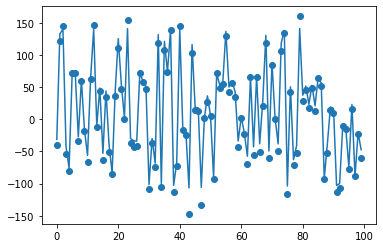

In [572]:
plt.scatter(list(range(0, Y.shape[0])), Y)
plt.plot(list(range(0, Y.shape[0])), a2[0])

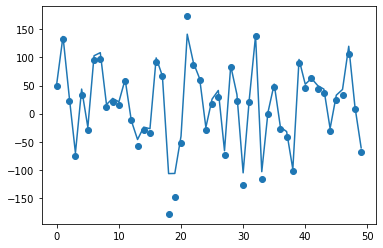

In [573]:
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a02[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


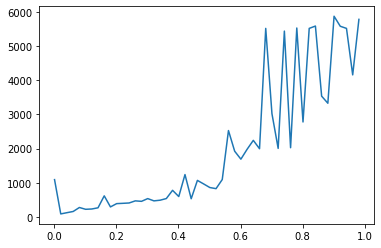

In [574]:
epoch=2000
numNeuron=5
learningRate = 0.001

learningRateArray = []
lossArray = []
while (learningRate <= 1.0):
    W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
    z_1 = np.dot(W1, Xtest.T) + b1
    a_1 = sigmoid(z_1)
    z_2 = np.dot(W2, a_1) + b2
    a_2 = z_2
    learningRateArray.append(learningRate)
    mse = mse_loss(a_2, Ytest)
    lossArray.append(mse)
    learningRate += 0.02

plt.plot(np.array(learningRateArray), np.array(lossArray))


Answer to question 5: As we can see from the graph above, the learning rate within the range from 0.001 to around 0.6 works well in terms of reducing MSE on testing data. However, when the learning rate gets larger than around 0.65, the neural network model cannot learn well (since it cannot reduce the value of loss function well), especially at around 0.85.

Hence, we can infer: the learning rate within the range from 0.001 to around 0.6 help the training process best while the leanring rate within the range from 0.6 to around 1.0 negatively impacts the training process.

With 1 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  1218.6482296340394


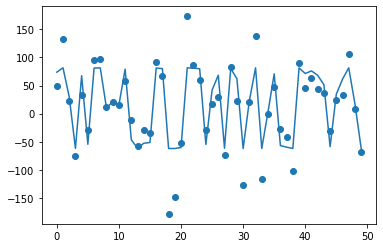

In [575]:
epoch=2000
learningRate = 0.01
numNeuron=1
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 2 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  543.3783344901678


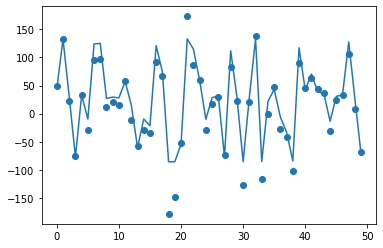

In [576]:
numNeuron=2
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 3 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  215.78294625968397


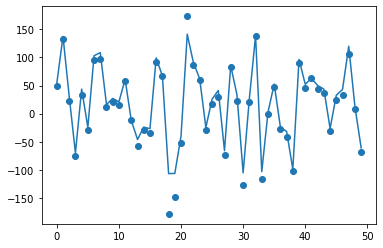

In [577]:
numNeuron=3
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 4 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  147.55320621260435


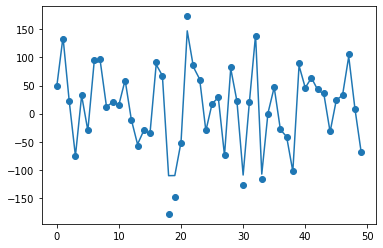

In [578]:
numNeuron=4
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 5 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  135.62403025446383


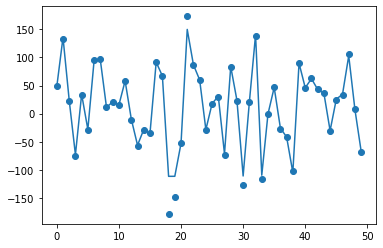

In [579]:
numNeuron=5
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 6 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  128.7995048349718


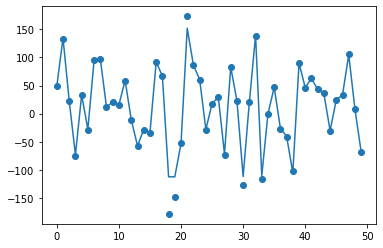

In [580]:
numNeuron=6
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 7 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  124.48694299684679


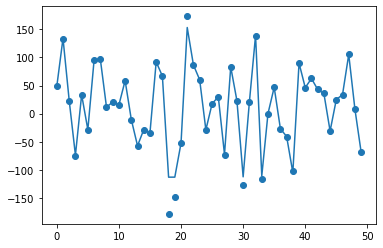

In [581]:
numNeuron=7
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 8 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  121.60368533011996


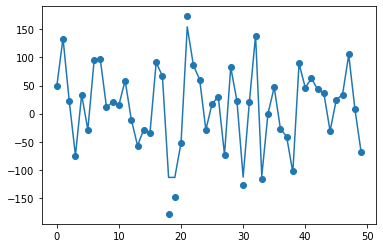

In [582]:
numNeuron=8
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 9 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  120.14737801952158


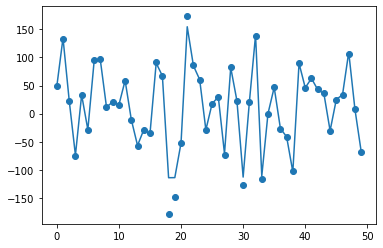

In [583]:
numNeuron=9
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

With 10 neurons in the hidden layer and learning rate of 0.01, we have:
The final MSE loss on testing dataset is:  117.56482831057063


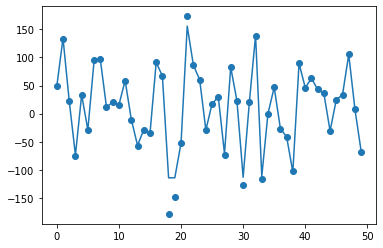

In [584]:
numNeuron=10
W1, W2, b1, b2, mseList = backpropTraining(epoch, numNeuron, learningRate, X, Y)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("With %d neurons in the hidden layer and learning rate of %.2f, we have:" % (numNeuron, learningRate))
print("The final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Answer to question 6:

a. When varying the number of neurons in the hidden layer, there is no need to change or derive again the update rule since the number of neurons in the hidden layer only reflects in one matrix dimension of weights (W1, W2) and b1 and won't change the form of update rules.

b. Report: as we can see from above 10 graphs, as the number of neurons in the hidden layers increases, the final loss on the testing dataset decrease and also the predicted target values fits better with true target values. Hence, we can infer larger number of neurons in hidden layer can help the training process better.

In [585]:
# Define tanh activation function
def tanh(z):
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
# Define derivative of tanh function
def tanh_derivative(z):
  return 1 - np.power(tanh(z), 2)
# Define ReLU activation function
def ReLU(z):
  return np.maximum(0, z)
# Define derivative of ReLU function
def ReLU_derivative(z):
  z[z > 0] = 1
  z[z <= 0] = 0
  return z

# Backprop
def backpropTrainingHighOrder(epoch, numNeuron, learningRate, x, y, acFunc, derivAct):

  W1 = np.random.rand(numNeuron,2)
  b1 = np.random.rand(numNeuron,1)
  W2 = np.random.rand(1,numNeuron)
  b2 = np.random.rand(1,1)

  numData = x.shape[0]

  mse_list = []
  for i in range(epoch):
      z1 = np.dot(W1, x.T) + b1
      # the activation function of hidden layer depends on passed parameter
      a1 = acFunc(z1)
      #print(a1)
      z2 = np.dot(W2, a1) + b2
      # the activation function of output layer is identity function
      a2 = z2
      #print(a2)
      # Initial output
      #print("Prediction:", a2, "Actual:", y)

      # calucate the loss
      mse = mse_loss(a2, Y)
      mse_list.append(mse)
      # Backward update
      # Compute gradients
      diff2 = (a2 - y)
      dW2 = np.dot(diff2, a1.T) * (2/numData)
      #print(W2)
      #print(dW2)
      #print(diff2)
      db2 = diff2.sum(axis=1) * (2/numData)
      db2 = db2.reshape(b2.shape)
      #print(b2)
      #print(db2)

      diff1 = np.dot(W2.T, diff2) * derivAct(z1)
      #print(diff1)
      dW1 = np.dot(diff1, x) * (2/numData)
      #print(W1)
      #print(dW1)

      db1 = diff1.sum(axis=1) * (2/numData)
      db1 = db1.reshape(b1.shape)
      #print(b1)
      #print(db1)

      # Update weights
      W2 = W2 - learningRate * dW2
      b2 = b2 - learningRate * db2
      W1 = W1 - learningRate * dW1
      b1 = b1 - learningRate * db1
  return (W1, W2, b1, b2, mse_list)

Using sigmoid function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  135.43780933221626


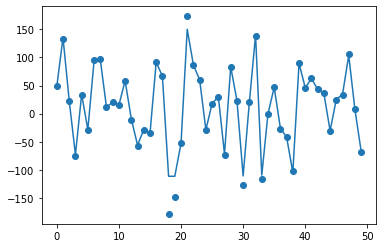

In [586]:
# experiment beginning with sigmoid activation function as comparsion sample
# let the epoch, learningRate and number of neuron in the hidden layer be same and do the comparison among them three
epoch=2000
learningRate = 0.01
numNeuron=5


W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, sigmoid, sigmoid_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using sigmoid function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Using tanh function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  5985.884593716699


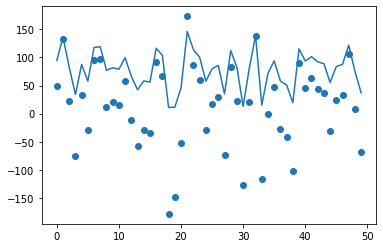

In [587]:
# experiment on tanh activation function with same numebr of neurons and learning rate
W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, tanh, tanh_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using tanh function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Using ReLU function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  5549.590939684763


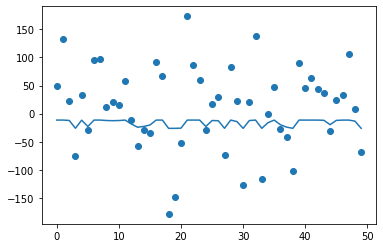

In [588]:
# experiment on ReLU activation function with same numebr of neurons and learning rate
W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, ReLU, ReLU_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using ReLU function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Using tanh function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  6379.419360107475


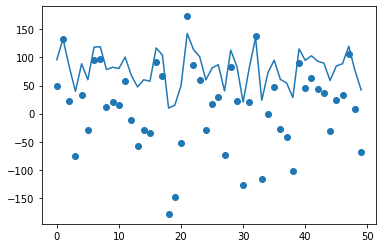

In [589]:
# can changing learning rate or number of neurons may make model using tanh activation perform better??? --- nope :(
epoch=2000
learningRate = 0.001
numNeuron=10
W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, tanh, tanh_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using tanh function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Using tanh function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  6234.882513481658


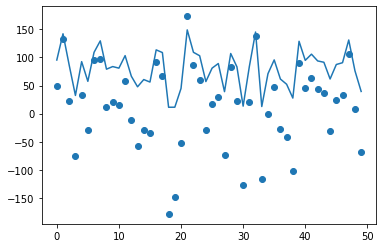

In [590]:
# can increasing learning rate may make model using tanh activation perform better??? --- nope :(
epoch=2000
learningRate = 0.1
numNeuron=10
W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, tanh, tanh_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using tanh function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Using tanh function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  4094.885409903741


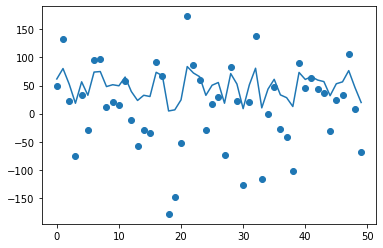

In [591]:
# can decreasing learning rate or number of neurons may make model using tanh activation perform better??? --- slightly :(
epoch=2000
learningRate = 0.0001
numNeuron=10
W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, tanh, tanh_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using tanh function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Using ReLU function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  6762.481375658761


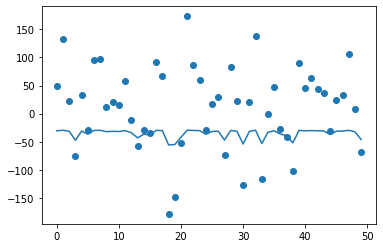

In [592]:
# can changing learning rate or number of neurons may make model using ReLU activation perform better??? --- nope :(
epoch=2000
learningRate = 0.001
numNeuron=10
W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, ReLU, ReLU_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using ReLU function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Using ReLU function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  5425.655097292535


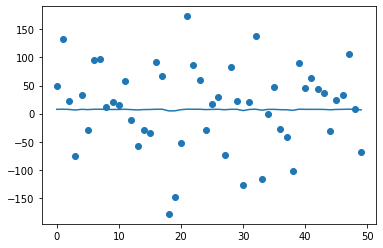

In [593]:
# can increase learning rate or number of neurons may make model using ReLU activation perform better??? --- nope :(
epoch=2000
learningRate = 0.02
numNeuron=10
W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, ReLU, ReLU_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using ReLU function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Using ReLU function as the activation function in the hidden layer, we have:
the final MSE loss on testing dataset is:  4403.342851276968


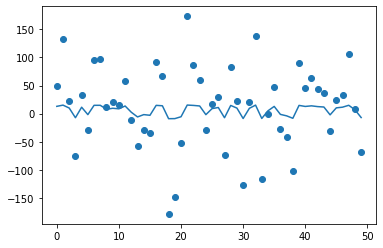

In [594]:
# can decrease learning rate or number of neurons may make model using ReLU activation perform better??? --- slightly :(
epoch=2000
learningRate = 0.0001
numNeuron=10
W1, W2, b1, b2, mseList = backpropTrainingHighOrder(epoch, numNeuron, learningRate, X, Y, ReLU, ReLU_derivative)
z_1 = np.dot(W1, Xtest.T) + b1
a_1 = sigmoid(z_1)
z_2 = np.dot(W2, a_1) + b2
a_2 = z_2
mse = mse_loss(a_2, Ytest)
print("Using ReLU function as the activation function in the hidden layer, we have:")
print("the final MSE loss on testing dataset is: ", mse)
plt.scatter(list(range(0, Ytest.shape[0])), Ytest)
plt.plot(list(range(0, Ytest.shape[0])), a_2[0])

Answer to question 7:

a. Yes, we do need to change the update rule

b. we need replace derivative of the activation function used in calculating dW1 and db1. Also, we need update the activation function for forward pass

c. Report: through comparison the results using different activation functions, we can tell the neural network model using sigmoid function as the activation function in the hidden layer fits the true target values the best. In contrast, the models using tanh and ReLU activation functions give much worse performance on training the model.  